In [ ]:
# I have finished Monday's labs after Tuesday and Wednesday's, so if something is missing most likely it is present in those subsequent labs.

# Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
cols=data.columns
cols

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
cols=list(map(lambda x: x.lower(),cols))
cols

['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [7]:
cols=list(map(lambda x: x.replace(' ','_'), cols))
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [8]:
data.columns=cols
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
# Customer_id as index

data = data.rename(columns={"customer": "customer_id"})
data.set_index("customer_id",inplace=True)

In [10]:
data.eq(' ').sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
data.isnull().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
#changing to datetime
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [13]:
# income to float:
data['income'] = data['income'].astype(float)

# Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [14]:
numerical = data.select_dtypes(include='number')
numerical.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [23]:
continuous_df=data[["customer_lifetime_value", "income", "total_claim_amount", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception"]]
discrete_df = numerical.drop(["customer_lifetime_value", "income", "total_claim_amount", "monthly_premium_auto", "months_since_last_claim", "months_since_policy_inception"], axis=1)

In [17]:
continuous_df.isnull().sum()

customer_lifetime_value          0
income                           0
total_claim_amount               0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
dtype: int64

# Plot a correlation matrix, what can you see?

## Correlation matrix - continuous

In [24]:
correlations_matrix_continuous = continuous_df.corr()
correlations_matrix_continuous

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
customer_lifetime_value,1.000000,0.024366,0.226451,0.396262,0.011517,0.009418
income,0.024366,1.000000,-0.355254,-0.016665,-0.026715,-0.000875
total_claim_amount,0.226451,-0.355254,1.000000,0.632017,0.007563,0.003335
monthly_premium_auto,0.396262,-0.016665,0.632017,1.000000,0.005026,0.020257
months_since_last_claim,0.011517,-0.026715,0.007563,0.005026,1.000000,-0.042959
months_since_policy_inception,0.009418,-0.000875,0.003335,0.020257,-0.042959,1.000000


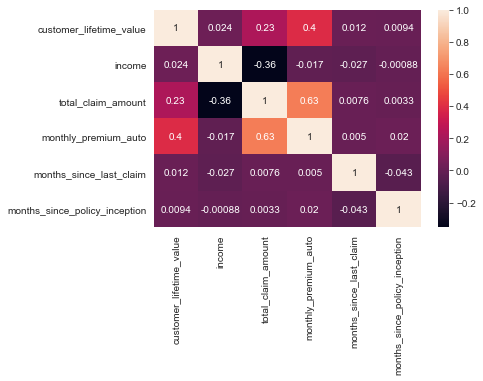

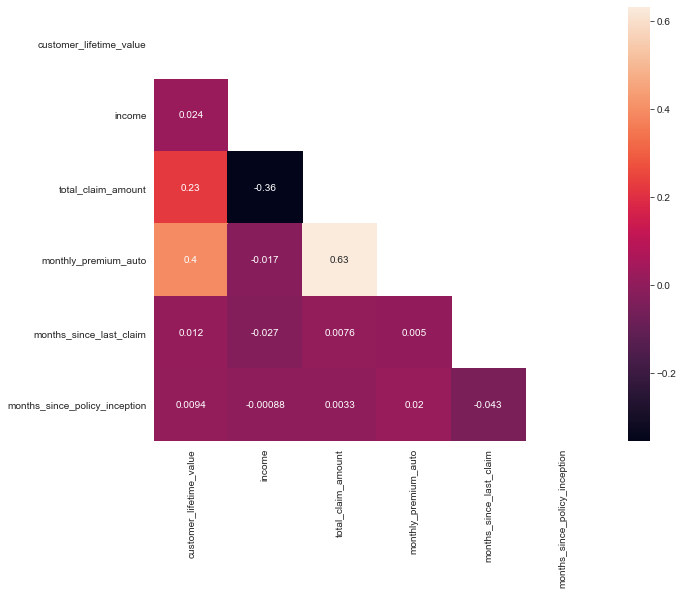

In [25]:
sns.heatmap(correlations_matrix_continuous, annot=True)
plt.show() # Full correlation matrix
mask = np.zeros_like(correlations_matrix_continuous)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix_continuous, mask=mask, annot=True)
plt.show() # Half correlation matrix

In [26]:
# Some correlation between Total Claim Amount (target variable) and Monthly Premium Auto.

## Correlation matrix - discrete

In [27]:
discrete_df.isnull().sum()

number_of_open_complaints    0
number_of_policies           0
dtype: int64

In [28]:
correlations_matrix_discrete = discrete_df.corr()
correlations_matrix_discrete

,number_of_open_complaints,number_of_policies
number_of_open_complaints,1.000000,0.001498
number_of_policies,0.001498,1.000000


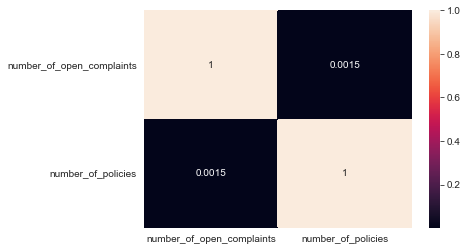

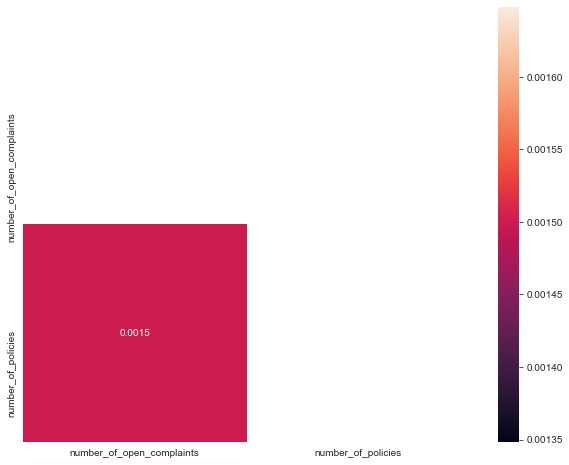

In [29]:
sns.heatmap(correlations_matrix_discrete, annot=True)
plt.show() # Full correlation matrix
mask = np.zeros_like(correlations_matrix_discrete)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix_discrete, mask=mask, annot=True)
plt.show() # Half correlation matrix

In [30]:
# No correlation between discrete variables.

## Correlation matrix - discrete and categorical together

In [31]:
correlations_matrix_numerical = numerical.corr()
correlations_matrix_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


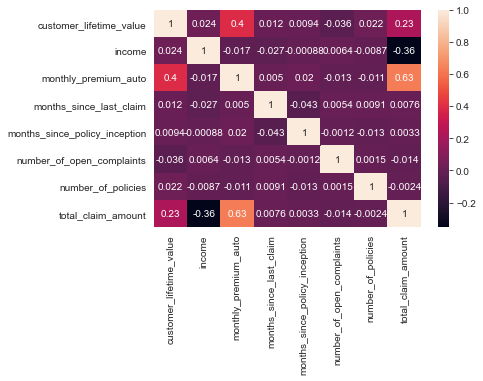

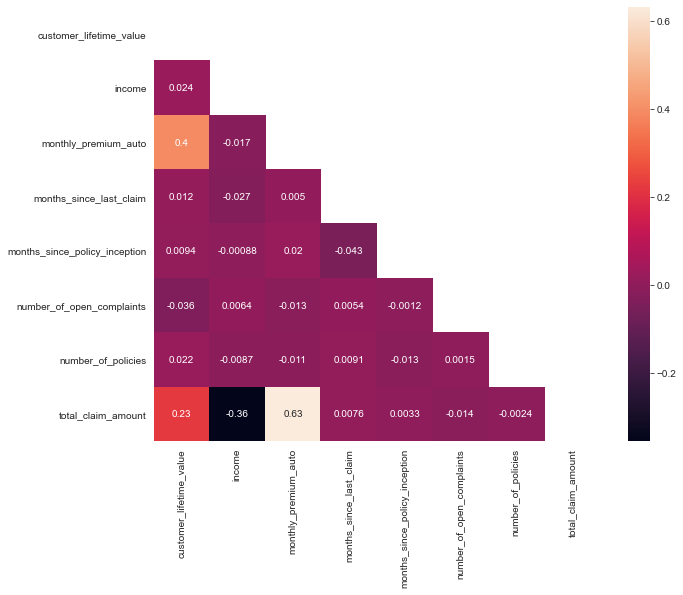

In [32]:
sns.heatmap(correlations_matrix_numerical, annot=True)
plt.show() # Full correlation matrix
mask = np.zeros_like(correlations_matrix_numerical)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix_numerical, mask=mask, annot=True)
plt.show() # Half correlation matrix

# Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

## Plots of discrete and continuous variables

### Discrete

In [33]:
def discrete_plot(df):
    for col in df.columns:
        sns.histplot(df[col])
        plt.show()

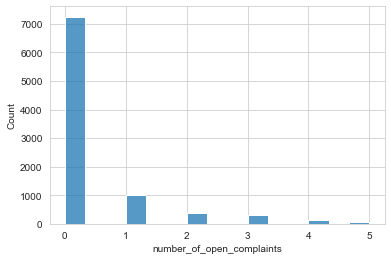

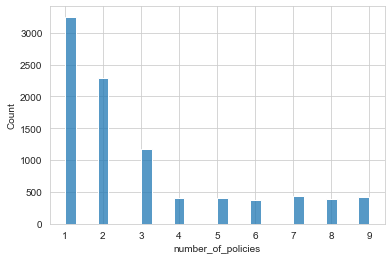

In [34]:
discrete_plot(discrete_df)

### Continuous

In [35]:
def continuous_plot(df):
    for col in df.columns:
        sns.distplot(df[col])
        plt.show()

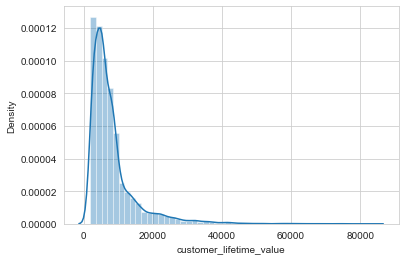

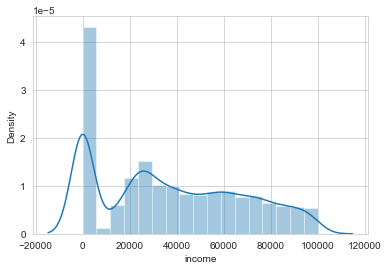

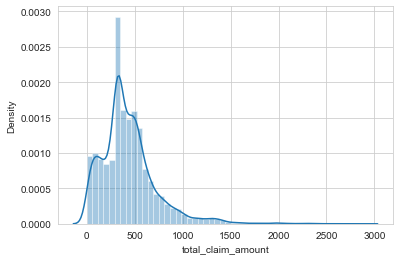

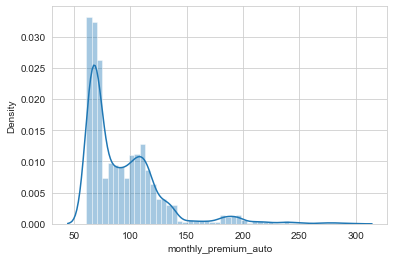

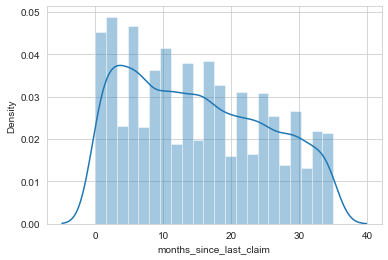

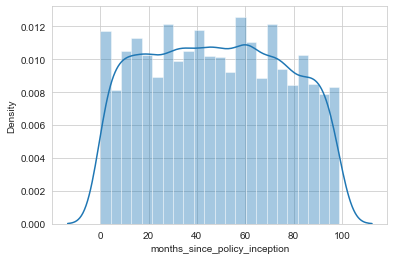

In [36]:
continuous_plot(continuous_df)

# What can you see in the plots?

In [37]:
# For columns with discrete values:

# There are many more counts of 0 for Number of open complaints than the other possible values;

# For columns with continuous values:

# None has an ideal standard distribution
# Can try a Q-Q plot:

In [38]:
from statsmodels.graphics.gofplots import qqplot

Q-Q plt for variable: customer_lifetime_value
Q-Q plt for variable: income
Q-Q plt for variable: total_claim_amount
Q-Q plt for variable: monthly_premium_auto
Q-Q plt for variable: months_since_last_claim
Q-Q plt for variable: months_since_policy_inception


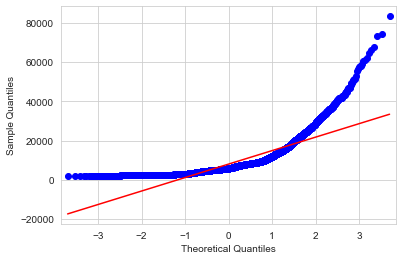

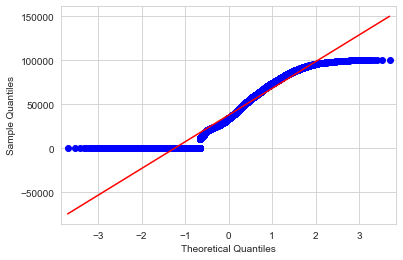

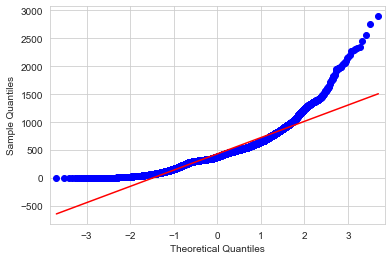

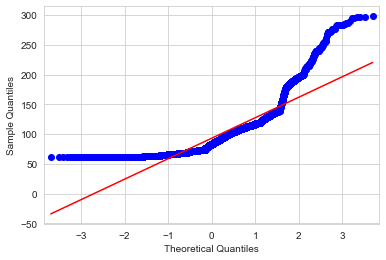

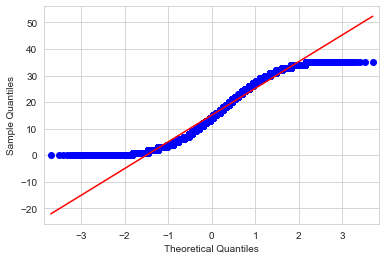

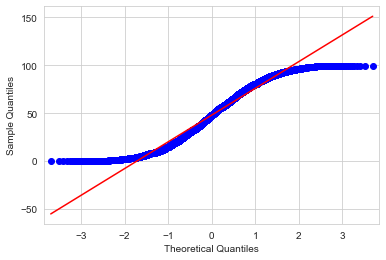

In [39]:
for col in continuous_df.columns:
    print ("Q-Q plt for variable:", col)
    qqplot(continuous_df[col], line="s")

In [40]:
from scipy.stats import skew, kurtosis
skew(continuous_df)

array([3.03178227, 0.28684016, 1.71468416, 2.1231977 , 0.27854056,
       0.04015837])

In [41]:
kurtosis(continuous_df)

array([13.8153107 , -1.09438383,  5.97547158,  6.18955826, -1.07373684,
       -1.13308258])

# Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


## Outliers in columns with continuous data

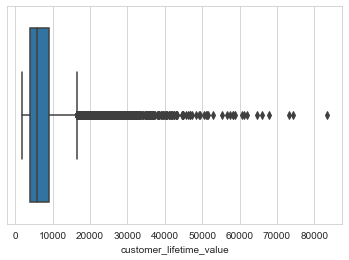

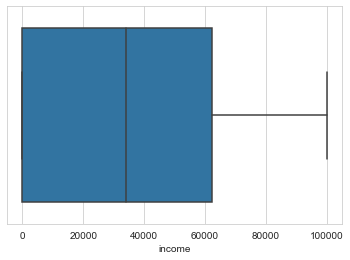

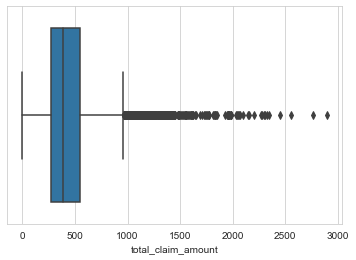

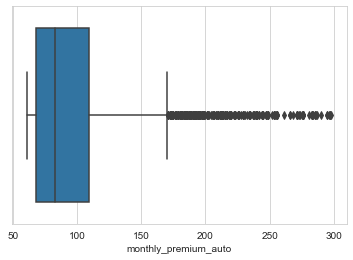

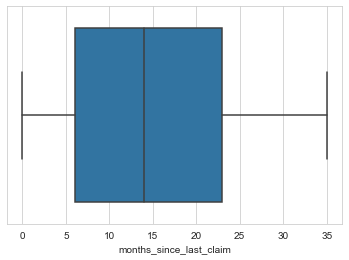

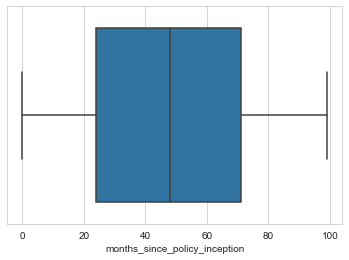

In [42]:
def box_plot(df):
    for col in df.columns:
        sns.boxplot(df[col])
        plt.show()
        
box_plot(continuous_df)

In [43]:
summary = continuous_df.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000,62320.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000


# Have you found outliers? If you have, what should we do with them?


In [44]:
# It seems to me that the valuable information would be lost by changing values of outliers.



# Customer Lifetime Value positively-skewed - I tried a log transformation

In [46]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [47]:
continuous_df["transformed_customer_lifetime_value"] = list(map(log_transfom_clean_, continuous_df["customer_lifetime_value"]))

In [48]:
continuous_df["transformed_customer_lifetime_value"].isna().sum()

0

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

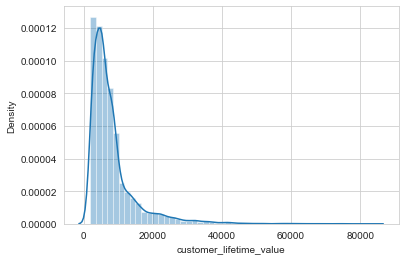

In [49]:
sns.distplot(continuous_df["customer_lifetime_value"])

<AxesSubplot:xlabel='transformed_customer_lifetime_value', ylabel='Density'>

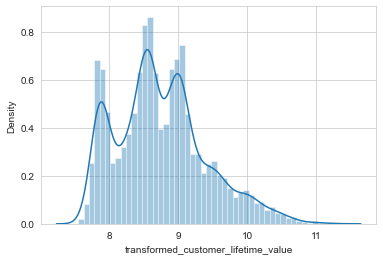

In [50]:
sns.distplot(continuous_df["transformed_customer_lifetime_value"])

<AxesSubplot:xlabel='customer_lifetime_value'>

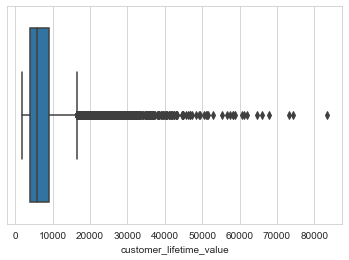

In [51]:
sns.boxplot(continuous_df["customer_lifetime_value"])

<AxesSubplot:xlabel='transformed_customer_lifetime_value'>

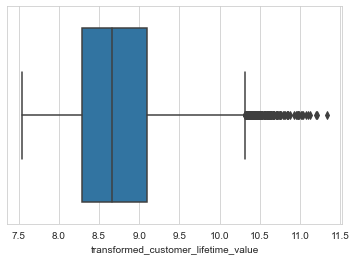

In [52]:
sns.boxplot(continuous_df["transformed_customer_lifetime_value"])

# Check nan values per column.


In [53]:
def clean_(x):
    if x in ['',' ']:
        return np.NaN
    else:
        return x

In [54]:
def clean_up(df):
    for col in df.columns:
        list(map(clean_, df[col]))

In [55]:
clean_up(continuous_df)

In [56]:
continuous_df.isnull().sum()

customer_lifetime_value                0
income                                 0
total_claim_amount                     0
monthly_premium_auto                   0
months_since_last_claim                0
months_since_policy_inception          0
transformed_customer_lifetime_value    0
dtype: int64

# Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical

df_cat = pd.DataFrame()
df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def diff_concr_discr_cat(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            df_cat[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            df_discr[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            df_cont[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))